## Read The Train and Test Dataset

In [14]:
import numpy as np
import pandas as pd

data = pd.read_csv('C:/Users/Shankeerthan/Desktop/Data-Storm 1.0/credit_card_default_train.csv')
test = pd.read_csv('C:/Users/Shankeerthan/Desktop/Data-Storm 1.0/credit_card_default_test.csv')

## Describe The Train Dataset

In [2]:
data.describe()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,24000.000000,2.400000e+04,24000.000000
mean,-0.014208,-0.130042,-0.158667,-0.215542,-0.261167,-0.287667,1.188697e+05,1.140727e+05,1.092435e+05,1.003573e+05,9.377699e+04,9.034068e+04,1.330648e+04,1.386675e+04,1.209312e+04,1.122527e+04,11174.737208,1.230122e+04,0.222083
std,1.124897,1.200566,1.198875,1.166608,1.131855,1.147847,1.710424e+05,1.652414e+05,1.614737e+05,1.490071e+05,1.417389e+05,1.387237e+05,3.935742e+04,5.648588e+04,4.065924e+04,3.624693e+04,36040.821759,4.233848e+04,0.415656
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.824900e+05,-1.611850e+05,-1.420790e+05,-3.927000e+05,-1.878820e+05,-7.844830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.246250e+03,6.968750e+03,6.238500e+03,5.429000e+03,4.179750e+03,2.913000e+03,2.310000e+03,1.956000e+03,9.010000e+02,6.930000e+02,610.000000,3.070000e+02,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.156850e+04,4.871700e+04,4.641150e+04,4.410500e+04,4.186300e+04,3.940900e+04,4.920000e+03,4.646500e+03,4.197000e+03,3.465000e+03,3465.000000,3.465000e+03,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.562745e+05,1.489050e+05,1.401622e+05,1.269750e+05,1.169262e+05,1.144352e+05,1.160500e+04,1.155000e+04,1.062600e+04,9.360000e+03,9411.500000,9.252500e+03,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.228020e+06,2.272881e+06,3.844046e+06,2.059564e+06,2.141765e+06,2.221444e+06,2.017905e+06,3.890638e+06,2.069852e+06,1.434510e+06,965557.000000,1.221218e+06,1.000000


## Data Preprocessing

In [15]:
def New_Balance_Limit_V1(x):
    if (x[-1]=="M"):
        x=float(x[:len(x)-1])*1000000
    elif(x[-1]=="K"):
        x=float(x[:len(x)-1])*1000
    else:
        x=float(x)
    return(x)

data["New_Balance_Limit_V1"] = data["Balance_Limit_V1"].apply(New_Balance_Limit_V1)
data.drop("Balance_Limit_V1",axis=1,inplace=True)
data.rename(columns={"New_Balance_Limit_V1" : "Balance_Limit_V1"},inplace=True)
col=list(data.columns)
last=col.pop()
col.insert(1,last)
data=data[col]

test["New_Balance_Limit_V1"] = test["Balance_Limit_V1"].apply(New_Balance_Limit_V1)
test.drop("Balance_Limit_V1",axis=1,inplace=True)
test.rename(columns={"New_Balance_Limit_V1" : "Balance_Limit_V1"},inplace=True)
col1=list(test.columns)
last1=col1.pop()
col1.insert(1,last1)
test=test[col1]

Change_values = {'Gender':{'M':1, 'F':0},
                'EDUCATION_STATUS':{'Graduate':2,'High School':1,'Other':0},
                'MARITAL_STATUS':{'Single':1,'Married':2,'Other':3},
                'AGE':{'Less than 30':0,'31-45':1,'46-65':2,'More than 65':3}}

data.replace(Change_values, inplace=True)
test.replace(Change_values, inplace=True)

index=data.pop('Client_ID')
label=data.pop('NEXT_MONTH_DEFAULT')

index1=test.pop('Client_ID')

## Plot The Correlation Matrix

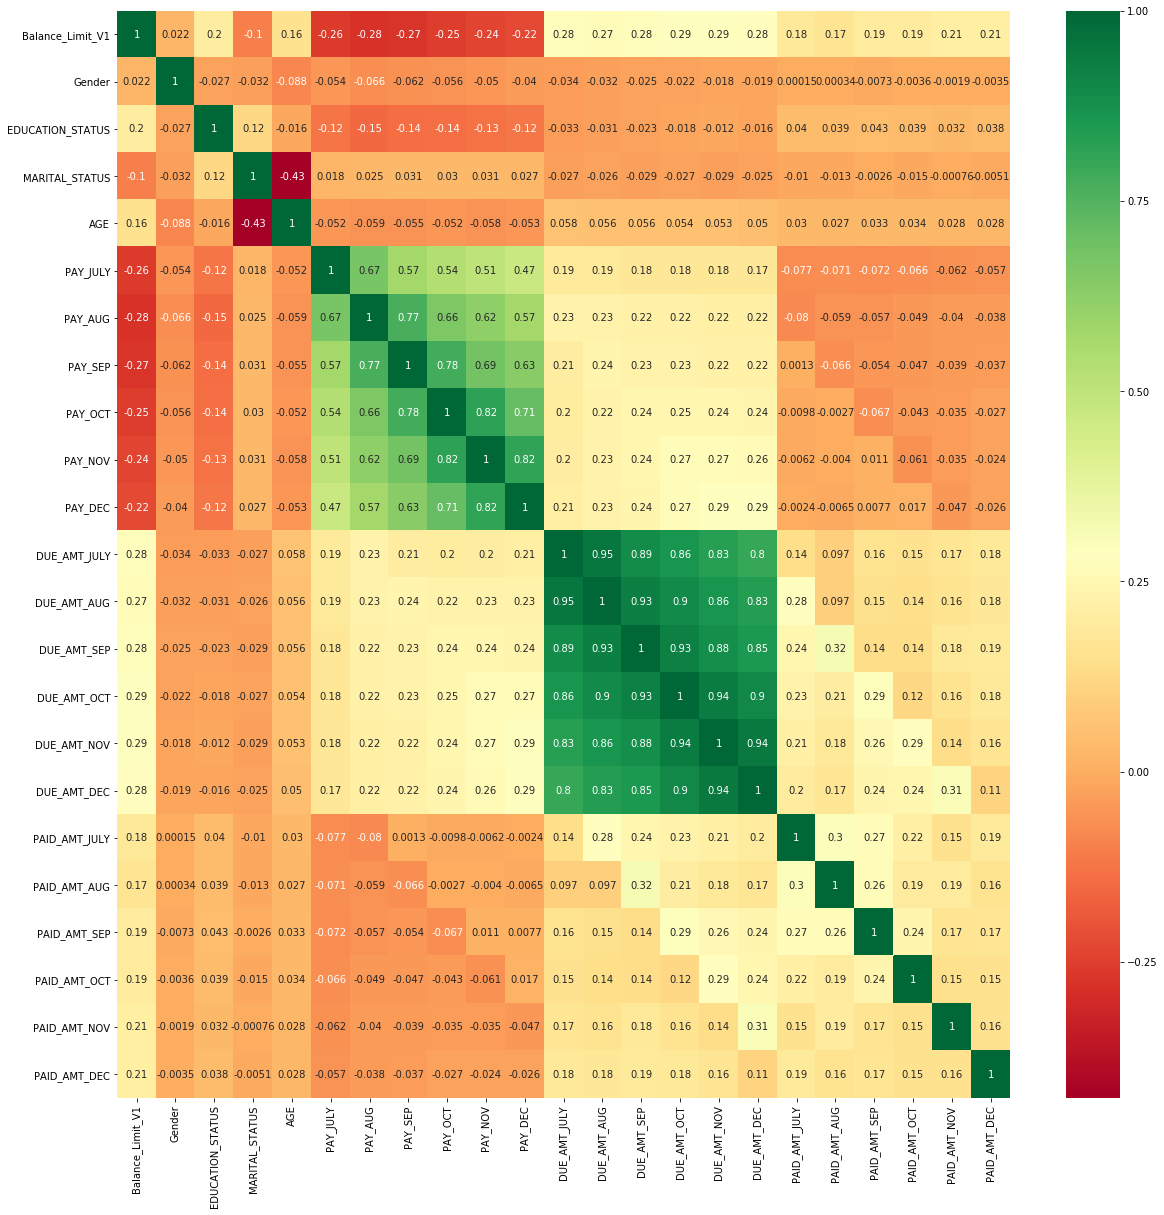

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

corrmatgraph=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
figure = corrmatgraph.get_figure()    
figure.savefig('data_corr.png', dpi=400)

## Feature Scaling

In [4]:
from sklearn import preprocessing

features = data.iloc[:,[0,11,12,13,14,15,16,17,18,19,20,21,22]].values
standscaler = preprocessing.StandardScaler()
data1= standscaler.fit_transform(features) 
data2 = np.concatenate((data1,data.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values),axis=1)
data = pd.DataFrame(data2)

features2 = test.iloc[:,[0,11,12,13,14,15,16,17,18,19,20,21,22]].values
test1 = standscaler.fit_transform(features2) 
test2 = np.concatenate((test1,test.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values),axis=1)
test = pd.DataFrame(test2)

## Feature Engineering

In [5]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    columns=[]
    for i in list(df.columns):
        columns.append(str(i))
    
    combos = list(combinations(columns,2))
        
    colnames = columns + ["_".join(x) for x in combos]
    
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies],axis=1)
    
    return df

data=add_interactions(data)
test=add_interactions(test)

## Train / Validation Split

In [7]:
feature_name = data.columns.tolist()
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_data, test_data, train_label, test_label = train_test_split( data, label, test_size = 0.38,random_state=100)

## Feature Correlation

In [8]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-50:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(data, label)
train_data_selected = train_data[cor_feature]
test_data_selected = test_data[cor_feature]
test_selected = test[cor_feature]

## Build The Xgboost Model

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import xgboost

model = xgboost.XGBClassifier()

eval_set = [(train_data_selected, train_label),(test_data_selected, test_label)]
model.fit(train_data_selected, train_label, eval_metric=["auc","error"], eval_set=eval_set, verbose=True)
predict_label = model.predict( test_data_selected )
print(classification_report(test_label,predict_label)) 

print ("AUC Score (Test): %f" % metrics.roc_auc_score(test_label, predict_label))

[0]	validation_0-auc:0.708286	validation_0-error:0.181317	validation_1-auc:0.713963	validation_1-error:0.175658
[1]	validation_0-auc:0.721555	validation_0-error:0.181519	validation_1-auc:0.726116	validation_1-error:0.175548
[2]	validation_0-auc:0.721572	validation_0-error:0.181519	validation_1-auc:0.726098	validation_1-error:0.175548
[3]	validation_0-auc:0.721743	validation_0-error:0.181317	validation_1-auc:0.726293	validation_1-error:0.175548
[4]	validation_0-auc:0.727894	validation_0-error:0.180578	validation_1-auc:0.731653	validation_1-error:0.175987
[5]	validation_0-auc:0.727838	validation_0-error:0.181452	validation_1-auc:0.731363	validation_1-error:0.176425
[6]	validation_0-auc:0.755382	validation_0-error:0.180645	validation_1-auc:0.757231	validation_1-error:0.175658
[7]	validation_0-auc:0.755594	validation_0-error:0.181788	validation_1-auc:0.757177	validation_1-error:0.176316
[8]	validation_0-auc:0.756106	validation_0-error:0.181989	validation_1-auc:0.757492	validation_1-error:0

[73]	validation_0-auc:0.774454	validation_0-error:0.176882	validation_1-auc:0.769048	validation_1-error:0.175987
[74]	validation_0-auc:0.774477	validation_0-error:0.176613	validation_1-auc:0.76902	validation_1-error:0.175877
[75]	validation_0-auc:0.774655	validation_0-error:0.176344	validation_1-auc:0.769212	validation_1-error:0.176206
[76]	validation_0-auc:0.774911	validation_0-error:0.176344	validation_1-auc:0.769362	validation_1-error:0.176096
[77]	validation_0-auc:0.775079	validation_0-error:0.176546	validation_1-auc:0.769436	validation_1-error:0.175877
[78]	validation_0-auc:0.775172	validation_0-error:0.176478	validation_1-auc:0.769385	validation_1-error:0.175987
[79]	validation_0-auc:0.775189	validation_0-error:0.176277	validation_1-auc:0.769387	validation_1-error:0.175877
[80]	validation_0-auc:0.775299	validation_0-error:0.175874	validation_1-auc:0.769399	validation_1-error:0.175548
[81]	validation_0-auc:0.775334	validation_0-error:0.175874	validation_1-auc:0.769392	validation_1

In [11]:
from numpy import sort
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_data_selected)
    # train model
    selection_model = XGBClassifier(learning_rate =0.02,n_estimators=1000, max_depth=6, min_child_weight=1, gamma=0.1, subsample=0.8,
                                    colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1,
                                    seed=30, random_state=100)

    selection_model.fit(select_X_train, train_label)
    # eval model
    select_X_test = selection.transform(test_data_selected)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(test_label, predictions)
    print("Thresh=%.4f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(test_label, predict_label))

Thresh=0.0000, n=50, Accuracy: 81.63%
AUC Score (Test): 0.659157
Thresh=0.0006, n=49, Accuracy: 81.66%
AUC Score (Test): 0.659157
Thresh=0.0029, n=48, Accuracy: 81.69%
AUC Score (Test): 0.659157
Thresh=0.0032, n=47, Accuracy: 81.52%
AUC Score (Test): 0.659157
Thresh=0.0033, n=46, Accuracy: 81.69%
AUC Score (Test): 0.659157
Thresh=0.0035, n=45, Accuracy: 81.59%
AUC Score (Test): 0.659157
Thresh=0.0036, n=44, Accuracy: 81.70%
AUC Score (Test): 0.659157
Thresh=0.0037, n=43, Accuracy: 81.57%
AUC Score (Test): 0.659157
Thresh=0.0040, n=42, Accuracy: 81.64%
AUC Score (Test): 0.659157
Thresh=0.0041, n=41, Accuracy: 81.55%
AUC Score (Test): 0.659157
Thresh=0.0042, n=40, Accuracy: 81.62%
AUC Score (Test): 0.659157
Thresh=0.0044, n=39, Accuracy: 81.56%
AUC Score (Test): 0.659157
Thresh=0.0045, n=38, Accuracy: 81.61%
AUC Score (Test): 0.659157
Thresh=0.0046, n=37, Accuracy: 81.64%
AUC Score (Test): 0.659157
Thresh=0.0048, n=36, Accuracy: 81.68%
AUC Score (Test): 0.659157
Thresh=0.0048, n=35, Accu

## Positives and Negatives

In [12]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predict_label == 1, test_label == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(predict_label == 0, test_label == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(predict_label == 1, test_label == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predict_label == 0, test_label == 1))
 
print ('TP: %i, FP: %i, TN: %i, FN: %i' % (TP,FP,TN,FN))

TP: 731, FP: 355, TN: 6779, FN: 1255


## Save predictions as csv File

In [ ]:
select_X_test = selection.transform(test_selected)

submit = pd.read_csv('C:/Users/ASUS/Desktop/datastrom/submit.csv')
predic=classifier.predict(test_selected)
Next_month=pd.DataFrame(predic,columns=['NEXT_MONTH_DEFAULT'])
submit=pd.concat([submit,Next_month],axis=1)
export_csv=submit.to_csv('C:/Users/ASUS/Desktop/datastrom/submit.csv',index=None)